In [1]:
from model2D import *
from data import *
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import np_utils

Using TensorFlow backend.


## Train 2D UNet
Data is in folder /data

The input shape of image: (batch_size,rows,cols,channel = 1) (256x256x1)

The input shape of mask: (batch_size,rows,cols,channel = 3) (256x256x3)

### Train 2D With Early Stopping

/home/ubuntu/unet-aws/model2D.py:125: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = outputs)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 64) 256         conv2d_2[0][0]                   
__________________________________________________________________________________________________
max_poolin

Train on 1000 samples, validate on 200 samples
Epoch 1/25
1000/1000 [==============================] - 31s 31ms/step - loss: 0.4413 - dice_coef: 0.5587 - val_loss: 0.3585 - val_dice_coef: 0.6415

Epoch 00001: loss improved from inf to 0.44126, saving model to unet_membrane.hdf5
Epoch 2/25
1000/1000 [==============================] - 22s 22ms/step - loss: 0.3182 - dice_coef: 0.6818 - val_loss: 0.3040 - val_dice_coef: 0.6960

Epoch 00002: loss improved from 0.44126 to 0.31821, saving model to unet_membrane.hdf5
Epoch 3/25
1000/1000 [==============================] - 22s 22ms/step - loss: 0.2788 - dice_coef: 0.7212 - val_loss: 0.2769 - val_dice_coef: 0.7231

Epoch 00003: loss improved from 0.31821 to 0.27885, saving model to unet_membrane.hdf5
Epoch 4/25
1000/1000 [==============================] - 22s 22ms/step - loss: 0.2481 - dice_coef: 0.7519 - val_loss: 0.2511 - val_dice_coef: 0.7489

Epoch 00004: loss improved from 0.27885 to 0.24806, saving model to unet_membrane.hdf5
Epoch 5/25
10

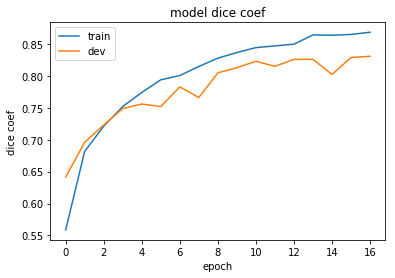

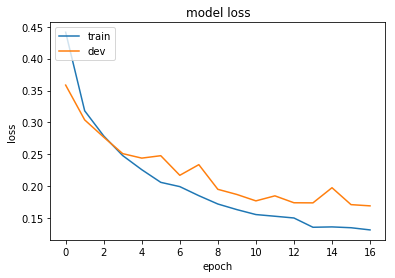

In [2]:
callbacks = [
    EarlyStopping(monitor='loss', min_delta=0.02, patience=4, verbose=0),
    ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose = 1, save_best_only = True),
]

# get data from the whole dataset
#images = train_all_new(as_gray = True)
#labels = label_all_new(as_gray = True)

#x_train, x_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.2, shuffle= True, random_state=1)
#x_dev, x_test, y_dev, y_test = train_test_split(x_valid, y_valid, test_size=0.5, shuffle= True, random_state=1)

x_train = shared_get_train(as_gray = True)
y_train = shared_get_mask(as_gray = True)

x_dev = shared_get_train_dev(as_gray = True)
y_dev = shared_get_mask_dev(as_gray = True)

x_test = shared_get_train_test(as_gray = True)
y_test = shared_get_mask_test(as_gray = True)

model = unet2d()

history = model.fit(x_train, y_train, validation_data=(x_dev, y_dev), batch_size=16, epochs =25, callbacks = callbacks)

print(history.history.keys())

# summarize history for dice score
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice coef')
plt.ylabel('dice coef')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

### Test Model and Save Predicted Results

In [ ]:
#x_test_o = test_train_new(as_gray = True)
#y_test_o = test_label_new(as_gray = True)

#x_dev, x_test, y_dev, y_test = train_test_split(x_test_o, y_test_o, test_size=0.5, shuffle= True, random_state=45)

model = unet2d()
model.load_weights("unet_membrane.hdf5")
results = model.predict(x_test, verbose=1)
test_score = soft_dice_coef(results, y_test)
print("test score: ", test_score)
save_result("data/test_result", results)